#                          OPTIMIZATION

Optimization is the process where our model gets to be trained that results in a maximum (the largest value of a function within a given range) and minimum (the smallest value of a function within a given range) function evaluation. We compare the results in every iteration by changing the hyperparameters in each step until we reach the optimum results. We create an accurate model with less error rate. There are different ways using which we can optimize a model. We will look into the followwing optimization algorithms.
          1. Gradient Descent
          2. Stochastic Gradient Descent

In [68]:
# importing libraries
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

Dataset that we will be looking at is the USA GDP. This dataset contains 2 variables, which are days and GDP in each day. 

In [77]:
Income = pd.read_csv('Income1.csv')

In [78]:
Income.head()

,Unnamed: 0,Education,Income
0,1,10.000000,26.658839
1,2,10.401338,27.306435
2,3,10.842809,22.132410
3,4,11.244147,21.169841
4,5,11.645485,15.192634


In [79]:
# Looking at the dtype
Income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  30 non-null     int64  
 1   Education   30 non-null     float64
 2   Income      30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [80]:
# Looking at the first 5 column of the usgdp dataset
Income.head()

,Unnamed: 0,Education,Income
0,1,10.000000,26.658839
1,2,10.401338,27.306435
2,3,10.842809,22.132410
3,4,11.244147,21.169841
4,5,11.645485,15.192634


In [81]:
# statistical summary
Income.describe()

,Unnamed: 0,Education,Income
count,30.000000,30.000000,30.000000
mean,15.500000,16.000000,50.145469
std,8.803408,3.642965,21.141553
min,1.000000,10.000000,15.192634
25%,8.250000,12.989967,29.078897
50%,15.500000,16.000000,49.871749
75%,22.750000,19.010033,71.140149
max,30.000000,22.000000,80.260571


# DATA VISUALIZATION

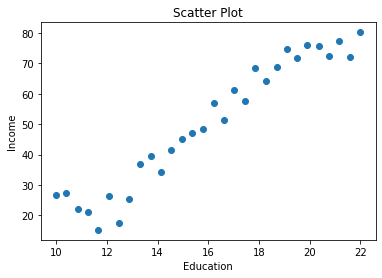

In [83]:
# Scatter plot with Limit against Income
plt.scatter(Income['Education'], Income['Income'])
  
# Adding Title to the Plot
plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('Education')
plt.ylabel('Income')
  
plt.show()

# GRADIENT DESCENT WITH LINEAR REGRESSION MODEL

In [87]:
# Creating the training and Test datasets
X =Income.iloc[:,1:2]
y =Income.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

print(X_train.shape)
print(X_test.shape)

def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

(21, 1)
(9, 1)


In [88]:
# standardizing data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [89]:
# Linear regression
lr = LinearRegression()

#fitting the model
lr.fit(X_train,y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Predicting the Test set results
y_pred = lr.predict(X_test)

# 1. GRADIENT DESCENT

Gradient Descent is an optimization algorithm that finds the local minimum of a differentiable function. It tweak parameters in order to minimize a cost function.

Gradient Descent measures the local gradient of the error function with regards to the parameter vector theta, and it goes in the direction of descending gradient. Once the gradient is zero, we have reached a minimum.

In Gradient Descent, we have an importtant parameter which is the size of the steps determined by the learning rate hyperparameter. If the learning rate is too small, then the algorithm will have to go through iterations to converge. While if the learning rate us too high, then the algorithm will diverge, with larger values, failing to find a good solution.

Learning Rate is a hyperparameter or tuning parameter that determines the step size at each iteration while moving towards minima in the function. 

Note: Scaling is important in Gradient Descent because it will take much longer to converge.

In [90]:
#cost function 
def single_point_cost(x,y,w):   
    y_pred= w * x

    #linear regression
    cost=( y_pred - y) **2  
    return cost

In [91]:
#grad function
def grad(x,y,w,):
    
    # derevative with respect to x
    grad_w=2 * x * ((w * x) - y ) 
    return grad_w

In [92]:
# here we have  only one parameter
w=0 

#learning rate
gamma=0.000001 
all_costs=[]
for k in range(60):
    cost=0
    for i in range(len(x)):
        a=single_point_cost(x[i],y[i],w)
        cost+=a
    
    #average cost
    cost1=cost/len(x)  
    all_costs.append(cost1)
    grad_w=0
    for j in range(len(x)):
        b=grad(x[j],y[j],w)
        grad_w+=b
        
        #avearge grad
    grad_w1=grad_w/len(x)  
    
    # in batch gradient descent update happens only one time
    w= w -  (gamma * grad_w1)  

optimal value w is  0.14688411132146026


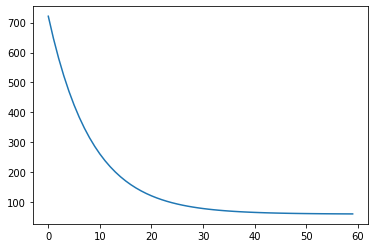

In [93]:
#optimal value of w
print("optimal value w is ",w) 
epochs=np.arange(60)
plt.plot(epochs,all_costs)

# 2. STOCHASTIC GRADIENT DESCENT

Stochastic Gradient Descent is an optimization algorithm that picks random instance in the training set at every step and computes the gradients based only on tha single instance. 

Obviously this makes the algorithm much faster since it has very little data to manipulate at every iteration. It also makes it possible to
train on huge training sets, since only one instance needs to be in memory at each iteration.

Stochastic Gradient Descent doesn't decrease until it reaches
the minimum, the cost function will bounce up and down, decreasing only on average. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down. So once the algorithm stops, the final parameter values are good, but not optimal.

hen the cost function is very irregular, this can actually help the
algorithm jump out of local minima, so Stochastic Gradient Descent has a better chance of finding the global minimum than Batch Gradient Descent does.

In [94]:
all_costs23=[]
w=0
gamma=0.000001
for k in range(60):
    for i in range(len(x)):
        cost21=single_point_cost(x[i],y[i],w)
        grad_w21=grad(x[i],y[i],w)
        
        # in sgd update takes place after every point
        w= w- (gamma * grad_w21) 
    all_costs23.append(cost21)

optimal value w is  0.15472139948322505


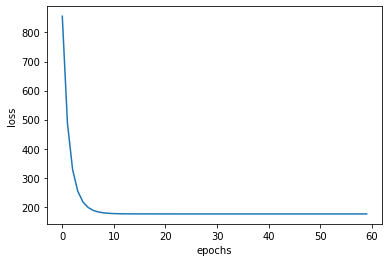

In [95]:
 #optimal value of w
print("optimal value w is ",w)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epochs,all_costs23)

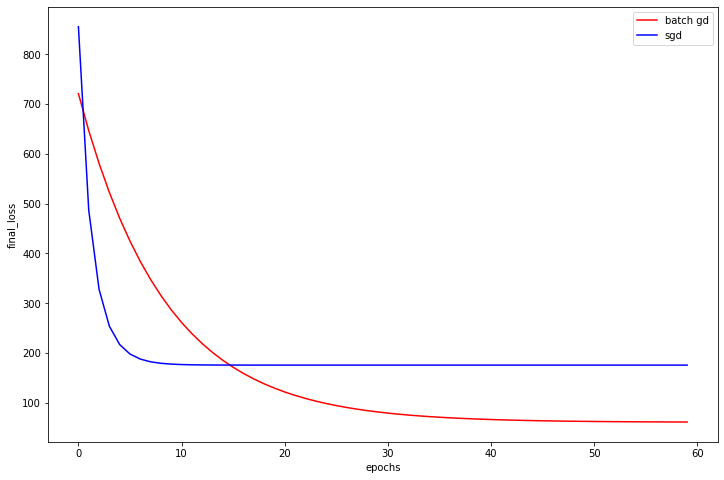

In [96]:
plt.figure(figsize=(12,8))
plt.plot(epochs,all_costs,c='r',label="batch gd")
plt.plot(epochs,all_costs23,c='b',label="sgd")
plt.xlabel("epochs")
plt.ylabel("final_loss")
plt.legend()
plt.show()